<a href="https://colab.research.google.com/github/alexa21e/cifar10-image-classification/blob/master/Deep_Learning_CIFAR10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
import os
import sys

DRIVE_PROJECT_ROOT = '/content/drive/MyDrive/Colab Notebooks'

drive.mount('/content/drive')

os.chdir(DRIVE_PROJECT_ROOT)
!pip install -r required_packages.txt

SRC_PATH = os.path.join(DRIVE_PROJECT_ROOT, 'src')
if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)

print("Finalized installing stage")

from main import load_and_preprocess_cifar10, create_baseline_cnn

(features_train, labels_train), (features_test, labels_test) = load_and_preprocess_cifar10()

baseline_model = create_baseline_cnn()

baseline_model.summary()

print("Finalized loading stage")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Finalized installing stage


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,902 (980.09 KB)

 Trainable params: 250,902 (980.09 KB)

 Non-trainable params: 0 (0.00 B)

Finalized loading stage


In [7]:
history = baseline_model.fit(
    # ARGUMENT 1: the input data (the images) the model will learn patterns from
    features_train,

    # ARGUMENT 2: the expected output (labels) the model aims to predict correctly
    labels_train,

    # ARGUMENT 3: epochs are the number of times the model will iterate over the
    # training dataset, repetitiveness  usually leads to better learning
    epochs=20,

    # ARGUMENT 4: batch_size is the number of samples processed before the model's
    # internal weights are updated, a larger batch size uses the GPU memory efficiently
    batch_size=128,

    # ARGUMENT 5: provides the model with a separate dataset made of both images
    # and labels to evaluate its performance after each epoch
    # this step can detect overfitting which appears when validation accuracy
    # stops increasing
    validation_data=(features_test, labels_test),

    # ARGUMENT 6: controls the amount of logs during training, has values 0, 1 or 2
    verbose=1
)

print("Finalized training")

loss, acc = baseline_model.evaluate(features_test, labels_test, verbose=0)
print(f"Accuracy on test training set: {acc*100:.2f}%")

drive_save_path = os.path.join(DRIVE_PROJECT_ROOT, 'baseline_cnn_weights.keras')
baseline_model.save(drive_save_path)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3424 - loss: 1.8277 - val_accuracy: 0.5315 - val_loss: 1.3348
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5489 - loss: 1.2764 - val_accuracy: 0.5864 - val_loss: 1.1917
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6058 - loss: 1.1259 - val_accuracy: 0.6246 - val_loss: 1.0898
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6452 - loss: 1.0170 - val_accuracy: 0.6413 - val_loss: 1.0543
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6709 - loss: 0.9515 - val_accuracy: 0.6640 - val_loss: 0.9861
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6901 - loss: 0.8918 - val_accuracy: 0.6678 - val_loss: 0.9646
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7110 - loss: 0.8436 - val_accuracy: 0.6792 - val_loss: 0.9429
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7257 - loss: 0.7957 - val_accuracy: 0

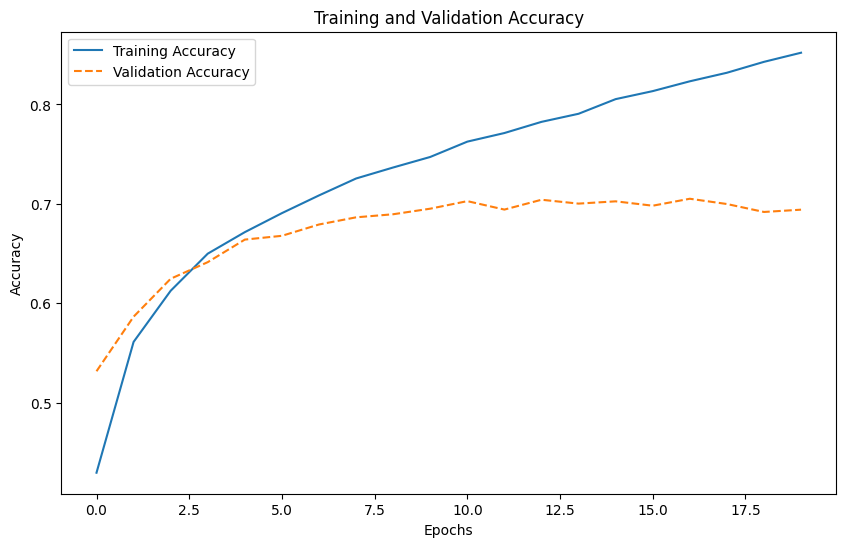

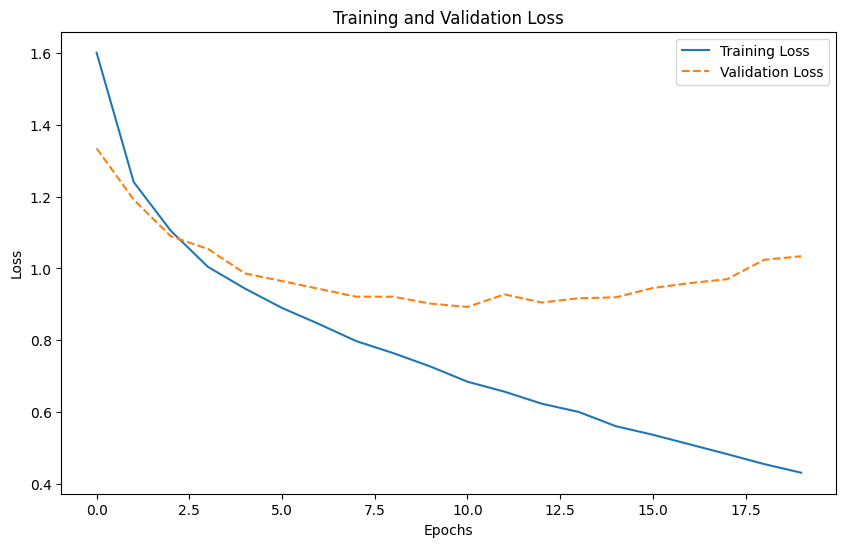

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10, 6))
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], linestyle='--', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], linestyle='--', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()